<a href="https://colab.research.google.com/github/votrannhatquang/AI-s-ng-th-7/blob/main/Milknew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading data File
import pandas as pd
url = 'milknew.csv'
dataframe = pd.read_csv(url)
print(dataframe.shape)
dataframe

(1059, 8)


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [2]:
# replace type from string to number
dataframe['Grade']=dataframe['Grade'].replace(["high", "low","medium"],[1,2,3])
dataframe

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,1
1,6.6,36,0,1,0,1,253,1
2,8.5,70,1,1,1,1,246,2
3,9.5,34,1,1,0,1,255,2
4,6.6,37,0,0,0,0,255,3
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,3
1055,6.7,38,1,0,1,0,255,1
1056,3.0,40,1,1,1,1,255,2
1057,6.8,43,1,0,1,0,250,1


In [3]:
print('Count:', dataframe.count())

Count: pH            1059
Temprature    1059
Taste         1059
Odor          1059
Fat           1059
Turbidity     1059
Colour        1059
Grade         1059
dtype: int64


In [4]:
#remove observations that have NAN value
data1=dataframe.dropna()
print('Count:', data1.count())

Count: pH            1059
Temprature    1059
Taste         1059
Odor          1059
Fat           1059
Turbidity     1059
Colour        1059
Grade         1059
dtype: int64


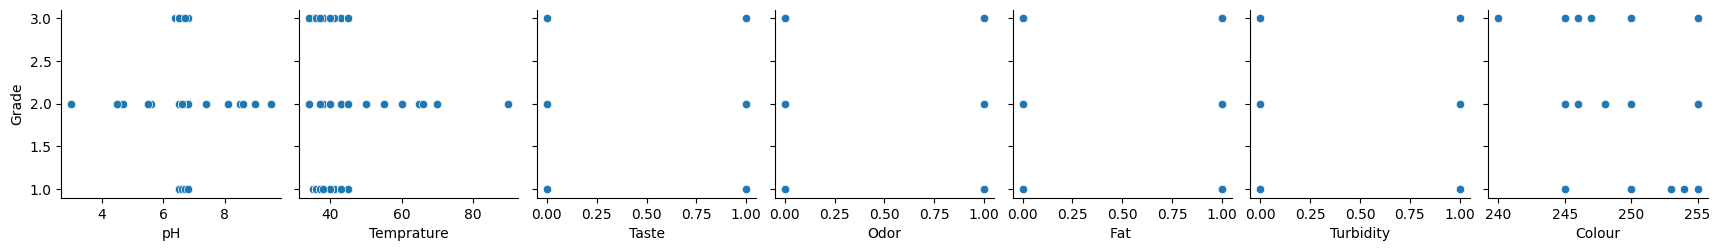

In [5]:
import seaborn as sns
# Create a pairplot of all features vs target
sns.pairplot(data1, y_vars=["Grade"], x_vars=data1.columns[:-1])

In [6]:
correlation=data1.corrwith(data1["Grade"])

In [7]:
print(correlation)

pH           -0.012518
Temprature   -0.094232
Taste        -0.197629
Odor         -0.454609
Fat          -0.501070
Turbidity    -0.428017
Colour       -0.212994
Grade         1.000000
dtype: float64


In [8]:
# seperate into features and target
features=data1.iloc[:,:-1]
print ("feature size: ",features.shape)
print (features)
target= data1.iloc[:,-1]
print ("target size: ",target.shape)
print (target)


feature size:  (1059, 7)
       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0     6.6          35      1     0     1          0     254
1     6.6          36      0     1     0          1     253
2     8.5          70      1     1     1          1     246
3     9.5          34      1     1     0          1     255
4     6.6          37      0     0     0          0     255
...   ...         ...    ...   ...   ...        ...     ...
1054  6.7          45      1     1     0          0     247
1055  6.7          38      1     0     1          0     255
1056  3.0          40      1     1     1          1     255
1057  6.8          43      1     0     1          0     250
1058  8.6          55      0     1     1          1     255

[1059 rows x 7 columns]
target size:  (1059,)
0       1
1       1
2       2
3       2
4       3
       ..
1054    3
1055    1
1056    2
1057    1
1058    2
Name: Grade, Length: 1059, dtype: int64


In [9]:
#number of each class: find out if they are imbalance classes or not
print('Number of type:', dataframe.groupby('Grade')['Grade'].count())


Number of type: Grade
1    256
2    429
3    374
Name: Grade, dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler
#standardize
std_scl=StandardScaler()
std_feature=std_scl.fit_transform(features)


In [11]:
#USING RANDOMFOREST ALGORITHSM TO TRAIN MODEL

#include library
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [12]:
#Loading data File
import pandas as pd
url = 'milknew.csv'
dataframe = pd.read_csv(url)

# replace type from string to number
dataframe['Grade']=dataframe['Grade'].replace(["high", "low","medium"],[1,2,3])

#remove observations that have NAN value
data1=dataframe.dropna()

# seperate into features and target
features=data1.iloc[:,:-1]
target= data1.iloc[:,-1]

#standardize
std_scl=StandardScaler()
std_feature=std_scl.fit_transform(features)


In [13]:
# split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(std_feature,target,test_size=0.2,random_state=0)


In [14]:
#Using randomforest algorithsm to train classification model
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(random_state=0,class_weight="balanced")
randomforest_model=randomforest.fit(x_train,y_train)


In [15]:
#predict and find accuracy
print("Accuracy:",randomforest_model.score(x_test,y_test))


Accuracy: 0.9905660377358491


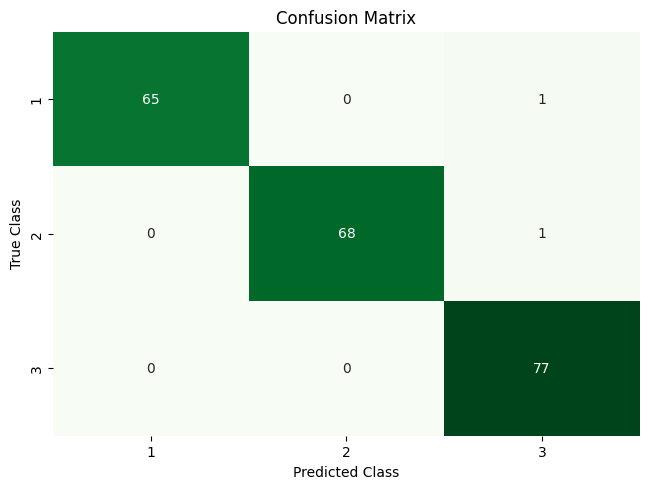

In [19]:

y_pred=randomforest_model.predict(x_test)

# get list of target of test data
if len(np.unique(y_test))>=len(np.unique(y_pred)):
    class_names=np.unique(y_test)
else: class_names=np.unique(y_pred)

# Create confusion matrix

matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Greens")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


In [20]:
from sklearn.pipeline import Pipeline

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier(random_state=0,class_weight="balanced"))])


In [24]:
# Create dictionary with candidate learning algorithms and their hyperparameters
search_space = {"classifier__n_estimators": [150,250,350,450],
                "classifier__max_features": [10,11,12,13,14,15]}


In [25]:
# Create grid search
gridsearch = GridSearchCV(pipe, search_space, cv=5,n_jobs=-1, verbose=1)
# Fit grid search
best_model = gridsearch.fit(x_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [26]:
#predict and find accuracy
print("Accuracy:",best_model.best_estimator_.score(x_test,y_test))


Accuracy: 0.9905660377358491


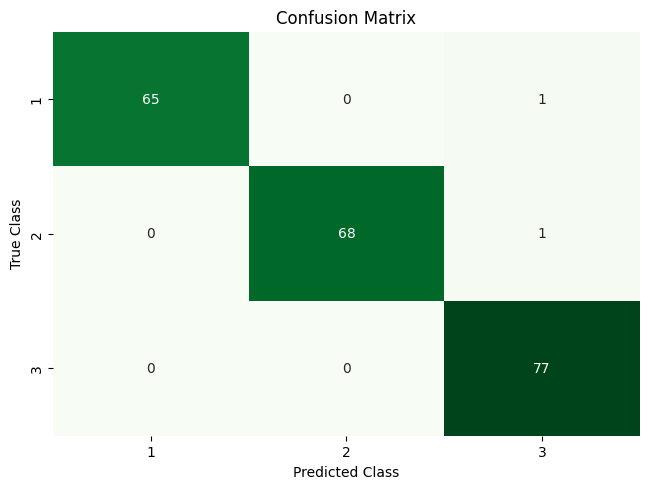

In [27]:
# predict test data
y_pred=best_model.best_estimator_.predict(x_test)

# get list of target of test data
if len(np.unique(y_test))>=len(np.unique(y_pred)):
    class_names=np.unique(y_test)
else: class_names=np.unique(y_pred)

# Create confusion matrix
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Greens")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


In [29]:
#USING LOGISTIC REGRESSION ALGORITHSM TO TRAIN MODEL

# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [30]:
#Loading data File
import pandas as pd
url = 'milknew.csv'
dataframe = pd.read_csv(url)

# replace type from string to number
dataframe['Grade']=dataframe['Grade'].replace(["high", "low","medium"],[1,2,3])

#remove observations that have NAN value
data1=dataframe.dropna()



#standardize
std_scl=StandardScaler()
std_feature=std_scl.fit_transform(features)

from sklearn.decomposition import PCA
#PCA
# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# Conduct PCA
std_feature = pca.fit_transform(std_feature)


In [31]:
logistic_regression = LogisticRegression(random_state=0,class_weight="balanced", multi_class="ovr")

# Train model
logistic_model = logistic_regression.fit(x_train, y_train)


In [32]:
#predict and find accuracy
print("Accuracy:",logistic_model.score(x_test,y_test))


Accuracy: 0.8679245283018868


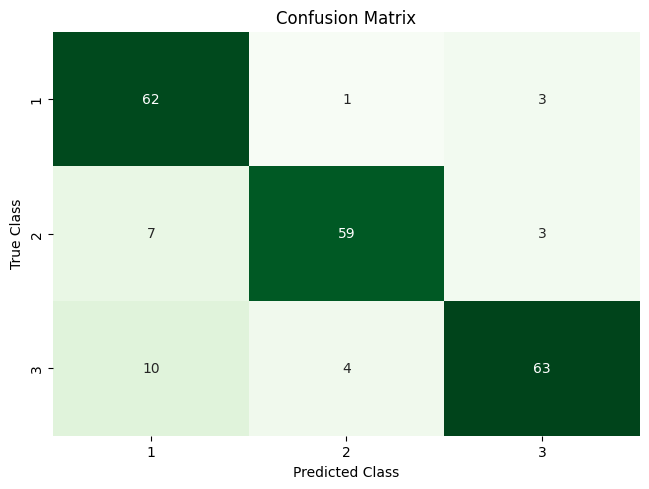

In [33]:
# predict test data
y_pred=logistic_model.predict(x_test)

# get list of target of test data
if len(np.unique(y_test))>=len(np.unique(y_pred)):
    class_names=np.unique(y_test)
else: class_names=np.unique(y_pred)

# Create confusion matrix
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Greens")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


In [34]:
#USING LOGISTIC REGRESSION ALGORITHSM WITH GRIDSEARCH TO TRAIN MODEL
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [35]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
#Loading data File
import pandas as pd
url = 'milknew.csv'
dataframe = pd.read_csv(url)

# replace type from string to number
dataframe['Grade']=dataframe['Grade'].replace(["high", "low","medium"],[1,2,3])

#remove observations that have NAN value
data1=dataframe.dropna()

from sklearn.decomposition import PCA
#PCA
# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# Conduct PCA
std_feature = pca.fit_transform(std_feature)


In [37]:
# Set random seed
np.random.seed(0)
# Create a pipeline
pipe = Pipeline([("classifier",LogisticRegression(random_state=0,class_weight="balanced", multi_class="ovr"))])

#create range of candidate penalty hyperparameter value
penalty=['l1','l2']

#create range of candidate regularization hyperparameter value
C=np.logspace(0,4,20)

#create hyperparameter options
hyperparameters=dict(classifier__C=C,classifier__penalty=penalty)


In [38]:
# Create grid search
gridsearch = GridSearchCV(pipe, hyperparameters, cv=5,n_jobs=-1, verbose=1)
# Fit grid search
best_model = gridsearch.fit(x_train, y_train)

#predict and find accuracy
print("Accuracy:",best_model.best_estimator_.score(x_test,y_test))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Accuracy: 0.8679245283018868


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

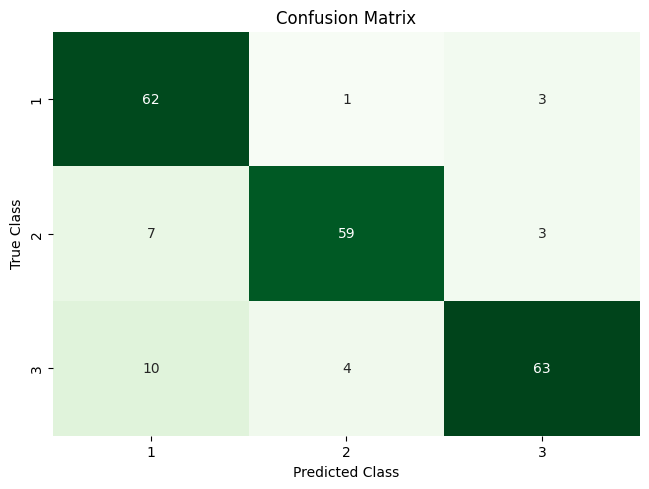

In [39]:
# predict test data
y_pred=best_model.best_estimator_.predict(x_test)

# get list of target of test data
if len(np.unique(y_test))>=len(np.unique(y_pred)):
    class_names=np.unique(y_test)


# Create confusion matrix
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Greens")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


In [40]:
#USING SUPPORT VECTOR MACHINE: SUPPORT VECTOR CLASSIFIER ALGORITHSM TO TRAIN MODEL

# Load libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [41]:
from sklearn.decomposition import PCA
#PCA
# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# Conduct PCA
std_feature = pca.fit_transform(std_feature)


In [42]:
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1, class_weight='balanced')

# Train the classifier
model = svc.fit(x_train, y_train)


In [43]:
print("Accuracy:",model.score(x_test,y_test))

Accuracy: 0.9481132075471698


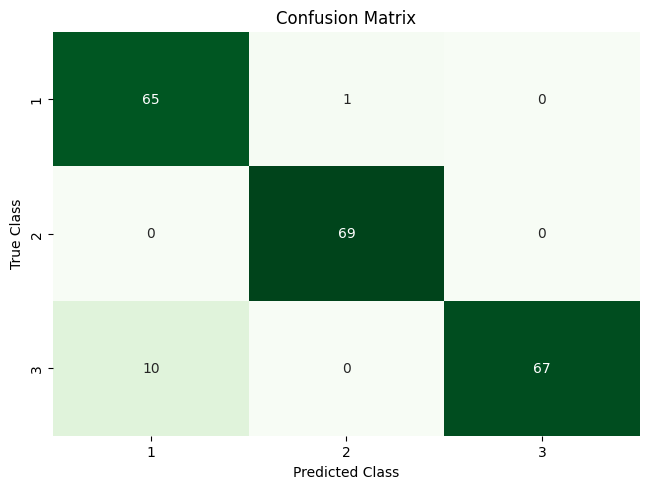

In [44]:
# predict test data
y_pred=model.predict(x_test)
# get list of target of test data
if len(np.unique(y_test))>=len(np.unique(y_pred)):
    class_names=np.unique(y_test)
else: class_names=np.unique(y_pred)

# Create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Greens")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


In [45]:
#USING GRIDSEARCH ON SUPPORT VECTOR MACHINE: SUPPORT VECTOR CLASSIFIER ALGORITHSM TO TRAIN MODEL
# include library
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [46]:
#PCA
# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# Conduct PCA
std_feature = pca.fit_transform(std_feature)


In [47]:
# Set random seed
np.random.seed(0)
# Create a pipeline
pipe = Pipeline([("classifier",SVC(kernel="rbf", random_state=0, gamma=1, class_weight='balanced'))])

#create range of candidate regularization hyperparameter value
C=np.logspace(0,3,50)
#create hyperparameter options
hyperparameters=dict(classifier__C=C)


In [48]:
# Create grid search
gridsearch = GridSearchCV(pipe, hyperparameters, cv=5,n_jobs=-1, verbose=1)
# Fit grid search
best_model = gridsearch.fit(x_train, y_train)

#predict and find accuracy
print("Accuracy:",best_model.best_estimator_.score(x_test,y_test))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Accuracy: 0.9952830188679245


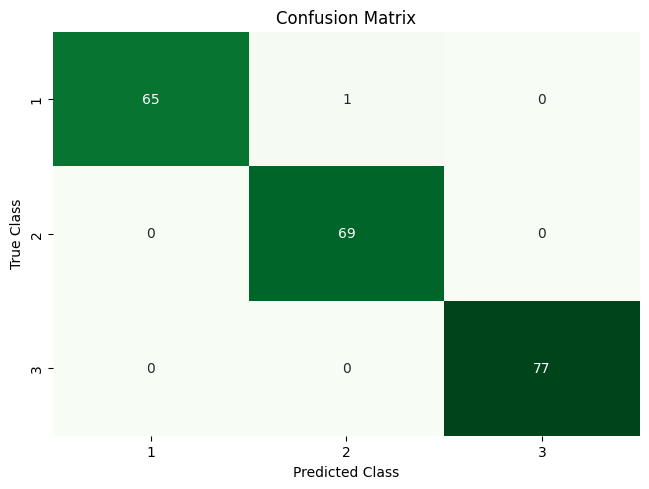

In [49]:
# predict test data
y_pred=best_model.best_estimator_.predict(x_test)

# get list of target of test data
if len(np.unique(y_test))>=len(np.unique(y_pred)):
    class_names=np.unique(y_test)
else: class_names=np.unique(y_pred)

# Create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Create pandas dataframe

dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Greens")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()
